In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# set the default dpi
plt.rcParams['figure.dpi'] = 100

# Prepare the plot

In [25]:
x = np.linspace(0, 2, 100)

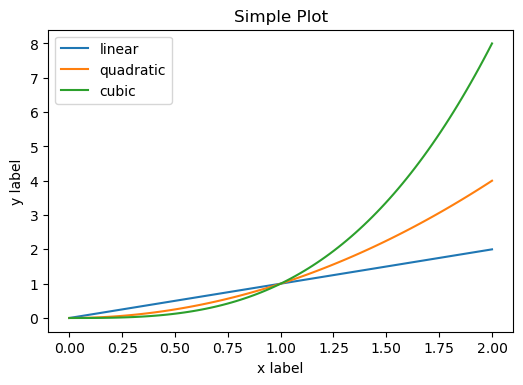

In [3]:
# Method 1.
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [26]:
plt.style.use('ggplot')

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

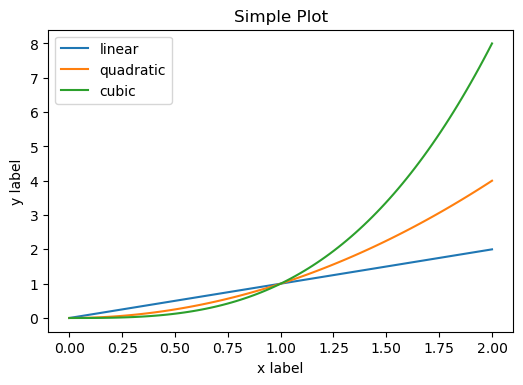

In [4]:
# Method 2
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

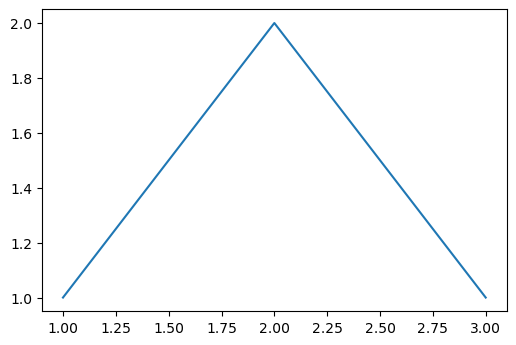

In [5]:
## The gneneral ploting format: ax.plotfunc() returns the artist collection
lines = plt.plot([1, 2, 3], [1, 2, 1])


In [6]:
lines

## Seting the layout

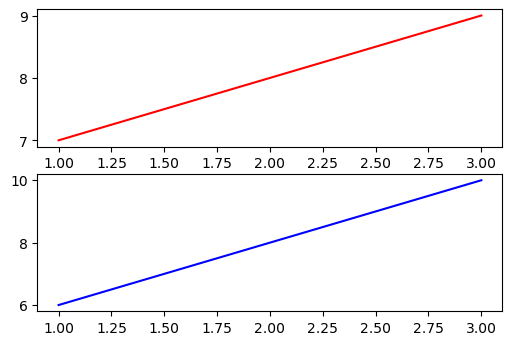

In [7]:
# subplot grids
fig, ax = plt.subplots(2, 1)
ax[0].plot([1, 2, 3], [7, 8, 9], color='r')
ax[1].plot([1, 2, 3], [6, 8, 10], color='b')

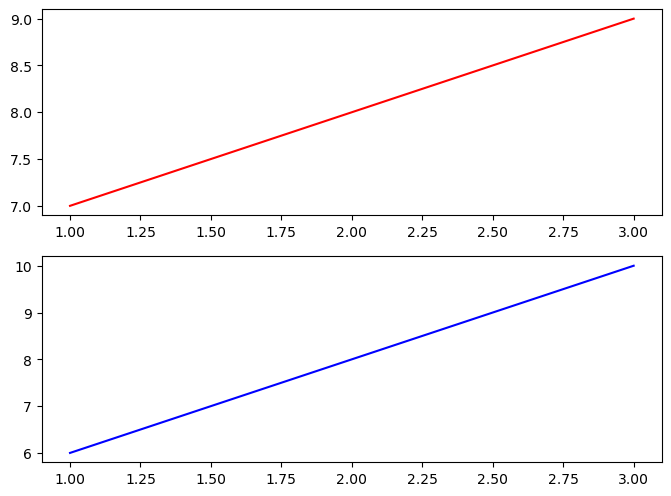

In [8]:
# set the figsize
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot([1, 2, 3], [7, 8, 9], color='r')
ax[1].plot([1, 2, 3], [6, 8, 10], color='b')

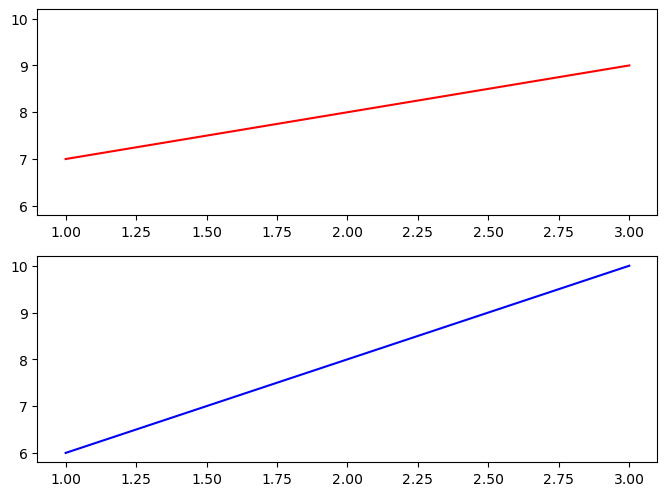

In [9]:
# sharex, sharey
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharey=True)
ax[0].plot([1, 2, 3], [7, 8, 9], color='r')
ax[1].plot([1, 2, 3], [6, 8, 10], color='b')

# Make the plot

## Line plots

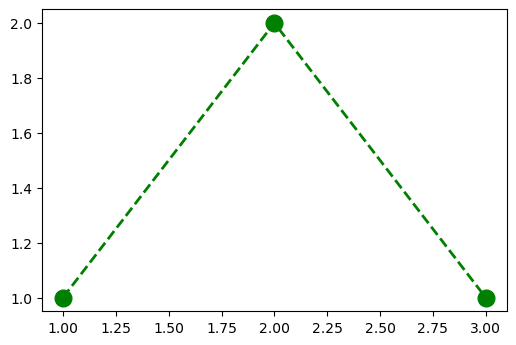

In [10]:
# a simple plot using fmt
x = [1, 2, 3]
y = [1, 2, 1]

plt.plot(x, y, 'go--', linewidth=2, markersize=12)

Text(0, 0.5, 'Annual Recharge (mm)')

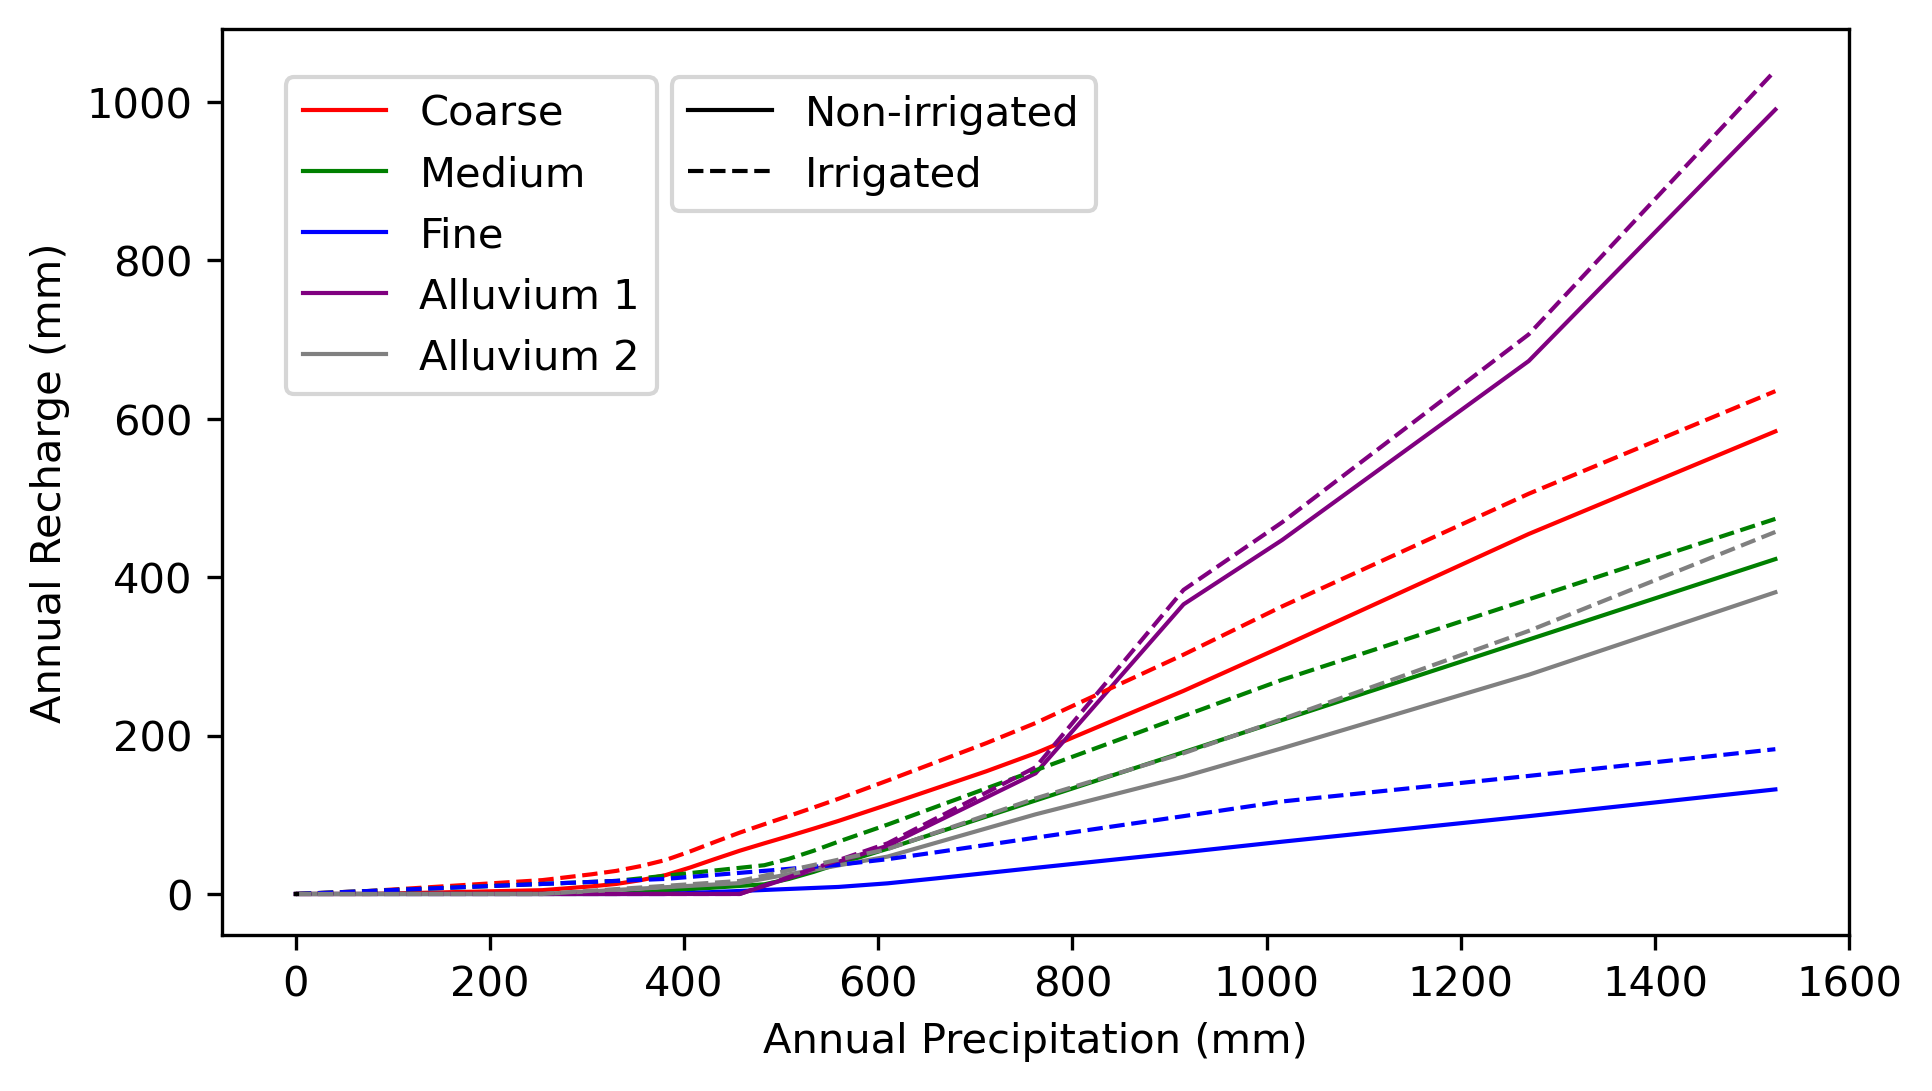

In [11]:
# setting line styles to deliver different information
da = pd.read_table(r'../data/recip_recharge.txt', sep=' ', comment='#', skipinitialspace=True, header=None)
da = da * 25.4
#da.iloc[:,1:] = (da.iloc[:,1:].T / da.iloc[:,0]).fillna(0).T
da.set_index(0, inplace=True)


fig, ax = plt.subplots(1, 1, figsize=(7, 4), sharex=True, sharey=True, dpi=300)

s = []; irr = []
s.append(ax.plot(da.iloc[:,0], 'r', linewidth=1, label='Coarse')[0])
s.append(ax.plot(da.iloc[:,2], 'g', linewidth=1, label='Medium')[0])
s.append(ax.plot(da.iloc[:,4], 'b', linewidth=1, label='Fine')[0])
s.append(ax.plot(da.iloc[:,6], 'purple', linewidth=1, label='Alluvium 1')[0])
s.append(ax.plot(da.iloc[:,8], 'grey', linewidth=1, label='Alluvium 2')[0])


ax.plot(da.iloc[:,1], 'r', linewidth=1, linestyle='--', label='')
ax.plot(da.iloc[:,3], 'g', linewidth=1, linestyle='--', label='')
ax.plot(da.iloc[:,5], 'b', linewidth=1, linestyle='--', label='')
ax.plot(da.iloc[:,7], 'purple', linewidth=1, linestyle='--', label='')
ax.plot(da.iloc[:,9], 'grey', linewidth=1, linestyle='--', label='')

# invisible lines for legend
irr.append(ax.plot([0,0], 'black', linewidth=1, linestyle='-', label='Non-irrigated')[0])
irr.append(ax.plot([0,0], 'black', linewidth=1, linestyle='--', label='Irrigated')[0])

l1 = plt.legend(handles=s, bbox_to_anchor=(0.28, 0.97))
ax.add_artist(l1)
ax.legend(handles=irr, bbox_to_anchor=(0.55, 0.97))

ax.set_xlabel('Annual Precipitation (mm)')
ax.set_ylabel('Annual Recharge (mm)')

## Bar plots

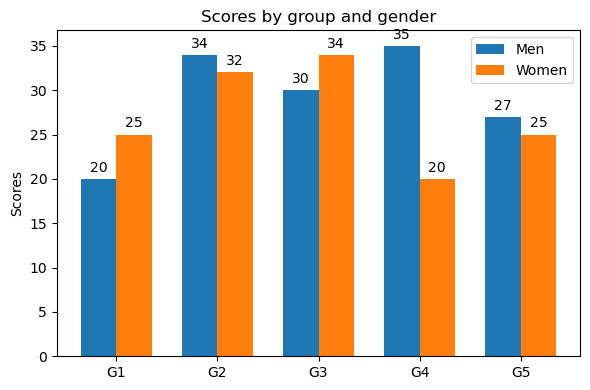

In [12]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

(<Figure size 920x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1eb1c5a3c08>)

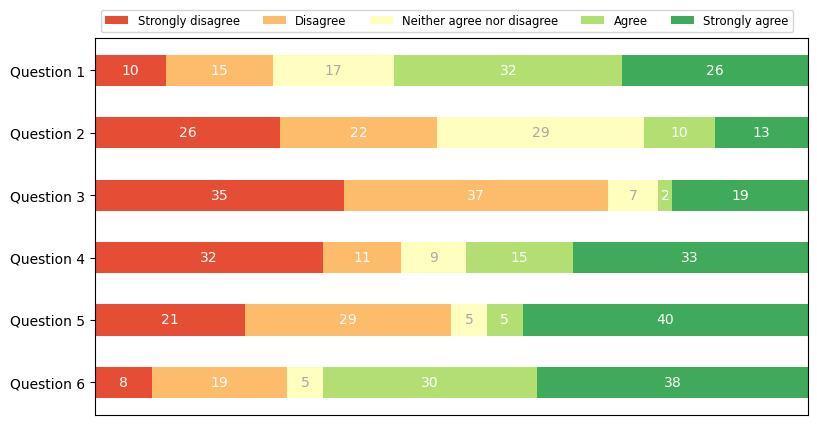

In [13]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)

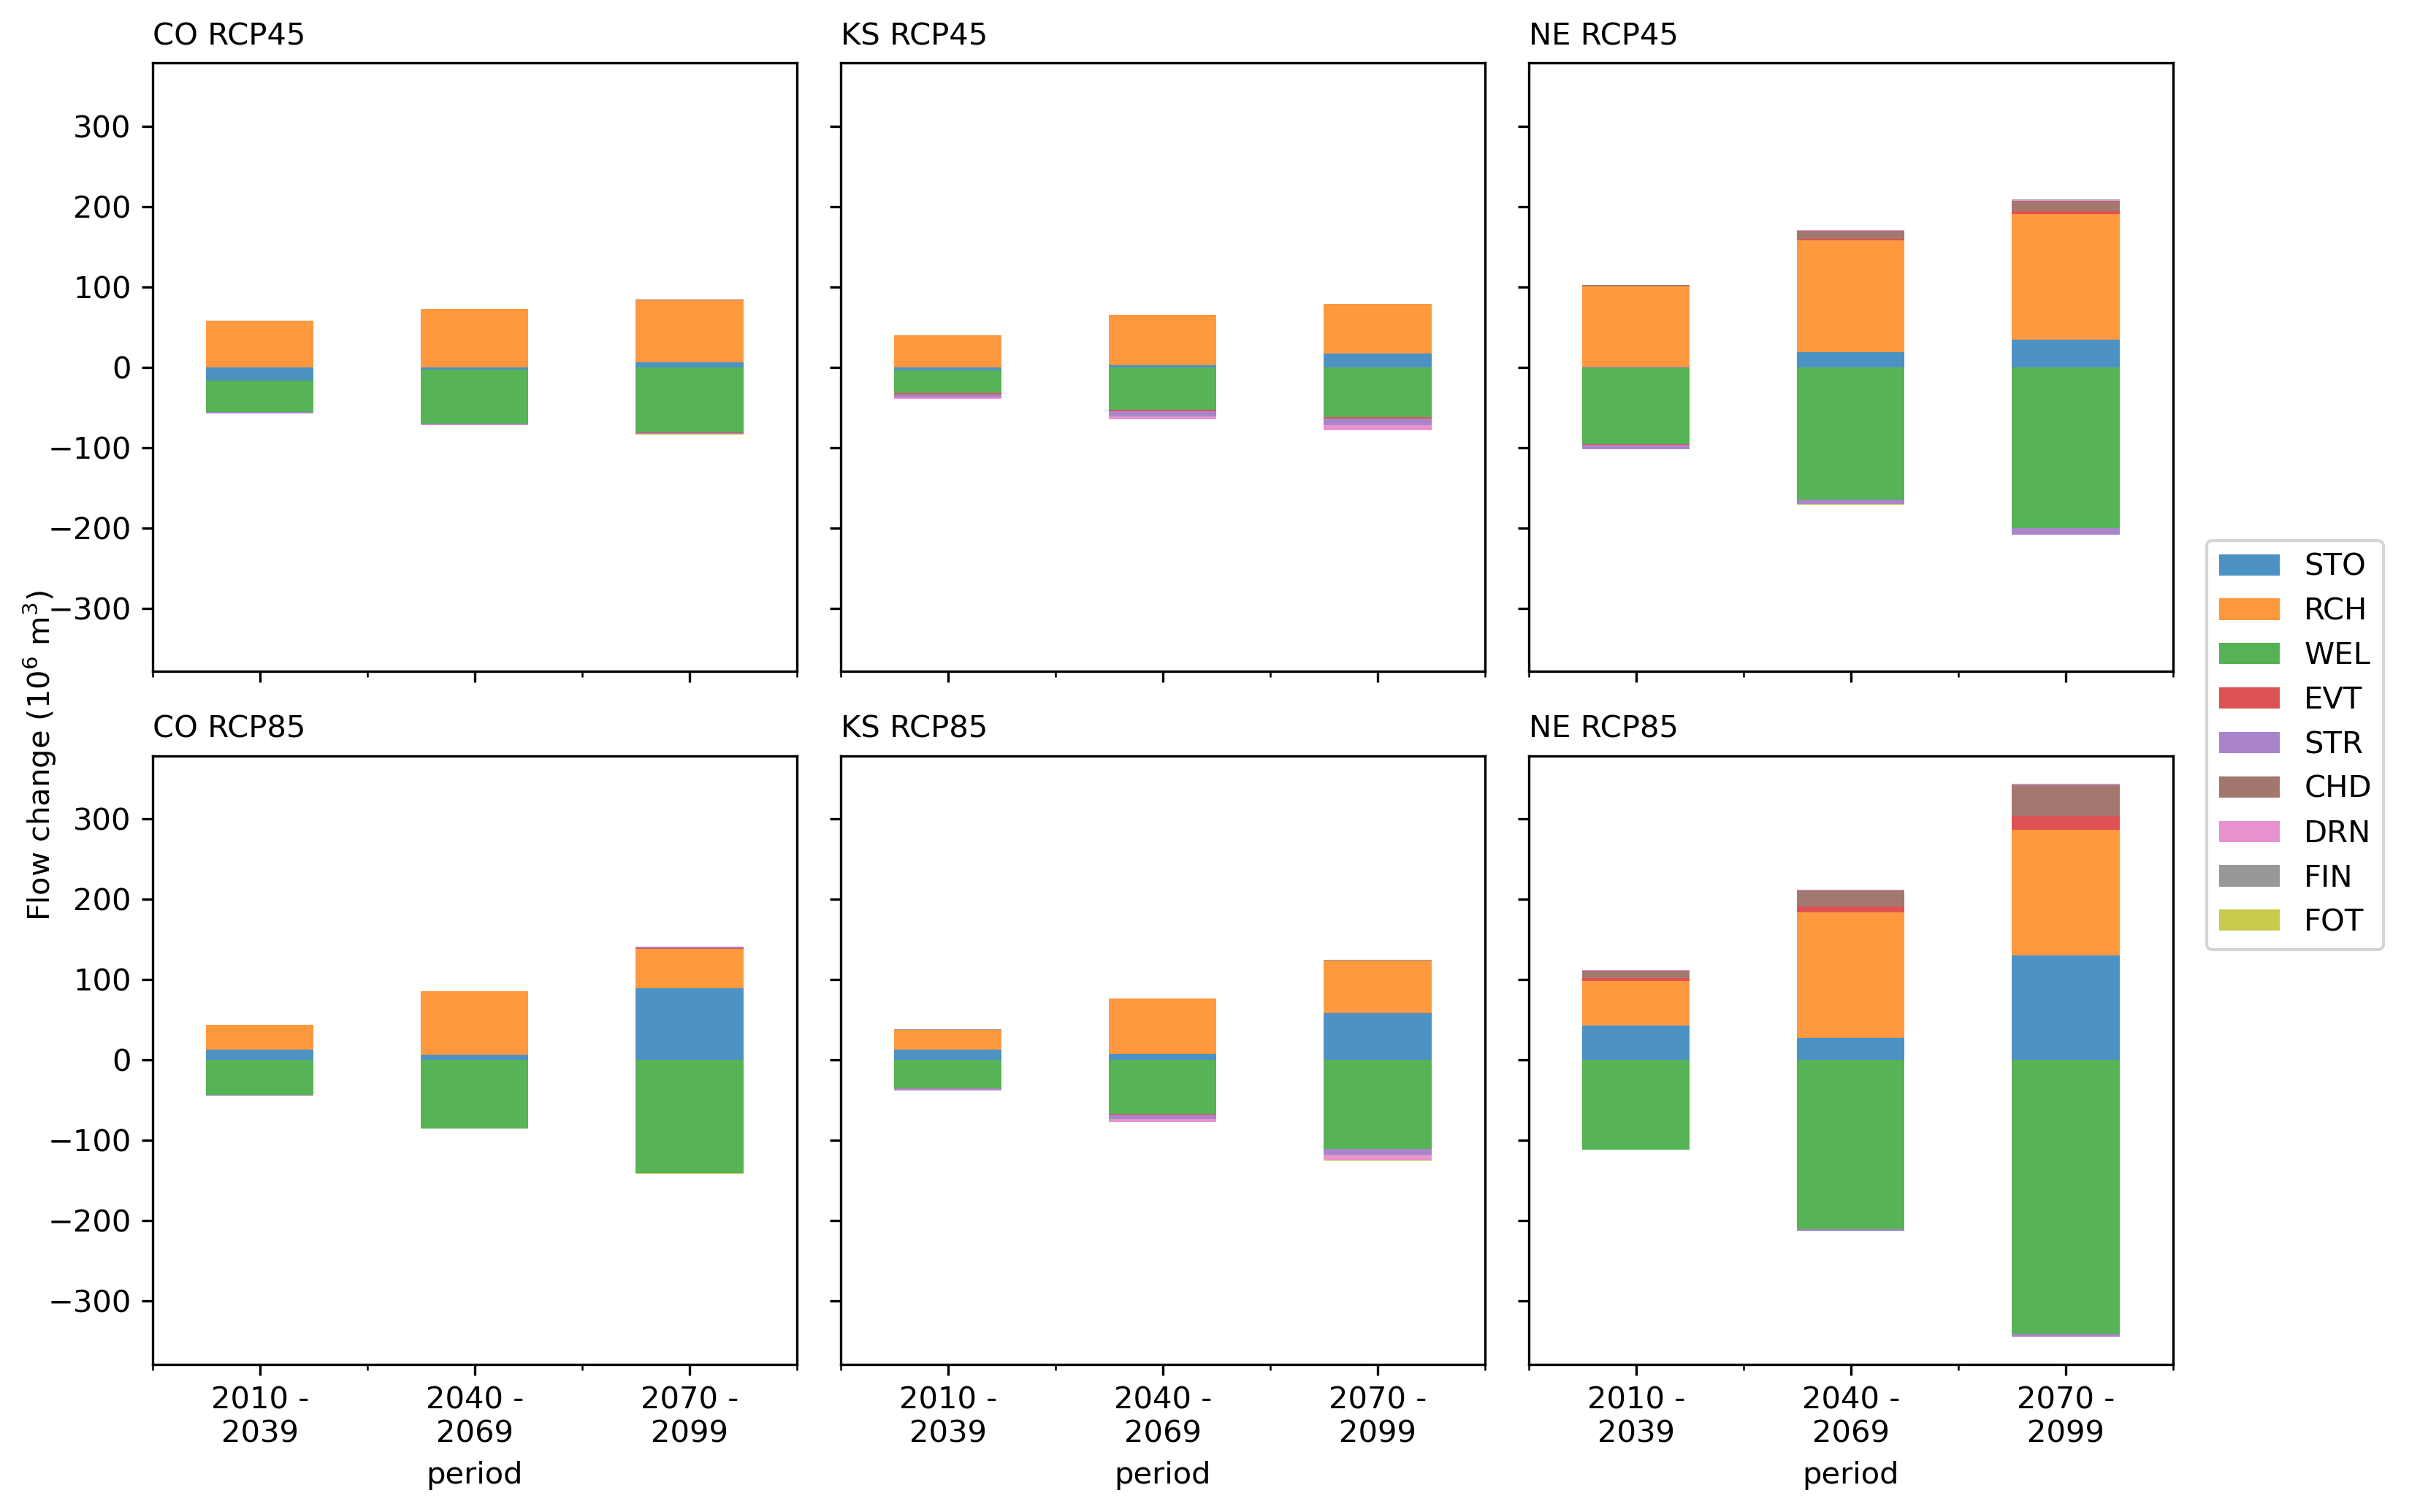

In [14]:
import matplotlib.patches as mpatches
df_bud = pd.read_csv('../data/budget_diff.csv')

fig, axs = plt.subplots(2,3, figsize=(10, 7), sharey=True, sharex=True, dpi=300)
axs = axs.flatten()
iax = -1
for g, d in df_bud.groupby(['rcp', 'state']):
    iax += 1
    ax = axs[iax]
    d = d.reset_index().set_index('period').drop(['rcp', 'state', 'index'], axis=1)
    d.columns = ['STO', 'RCH', 'WEL', 'EVT', 'STR', 'CHD', 'DRN', 'FIN', 'FOT']
    d.plot.bar(ax=ax, stacked=True, legend=False, alpha=0.8)
    ax.set_title(g[1].upper() + ' ' + g[0].upper(), fontdict={'fontsize': 10}, loc='left')
    #ax.grid(axis='y')
    
    if g[0] == 'rcp45':
        #ax.set_ylim(-220, 220)
        pass
    else:
        #ax.set_ylim(-3300, 3300)
        ax.xaxis.set_ticklabels(['2010 -\n2039', '2040 -\n2069','2070 -\n2099'], rotation=0)

fig.tight_layout()
fig.text(0.02, 0.5, 'Flow change (10$^6$ m$^3$)', ha='right', va='center', rotation='vertical')

# create mpatches for legends
ic = 0; recs = [];
lbl = ['STO', 'RCH', 'WEL', 'EVT', 'STR', 'CHD', 'DRN', 'FIN', 'FOT']
for l in lbl:
    recs.append(mpatches.Circle((0,0), 1, fc='C' + str(ic), alpha=0.8))
    ic += 1

fig.legend(recs, lbl, loc='center left', bbox_to_anchor=(1.0, 0.5))



## Scatter plot

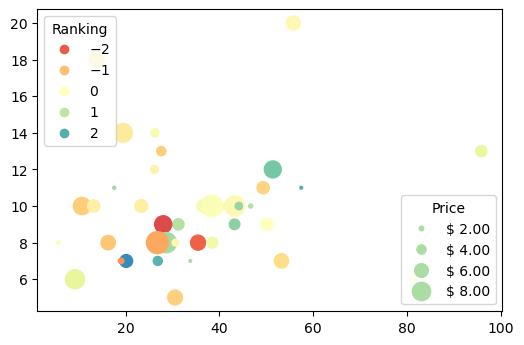

In [15]:
volume = np.random.rayleigh(27, size=40)
amount = np.random.poisson(10, size=40)
ranking = np.random.normal(size=40)
price = np.random.uniform(1, 10, size=40)

fig, ax = plt.subplots()

# Because the price is much too small when being provided as size for ``s``,
# we normalize it to some useful point sizes, s=0.3*(price*3)**2
scatter = ax.scatter(volume, amount, c=ranking, s=0.3*(price*3)**2,
                     vmin=-3, vmax=3, cmap="Spectral")

# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="Ranking")
ax.add_artist(legend1)

# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="$ {x:.2f}",
          func=lambda s: np.sqrt(s/.3)/3)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Price")


## Fill between

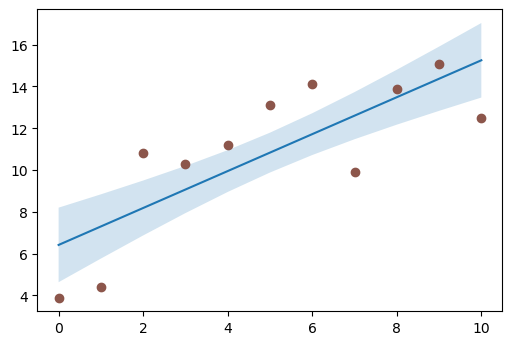

In [16]:
# A common application for fill_between is the indication of confidence bands.

N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

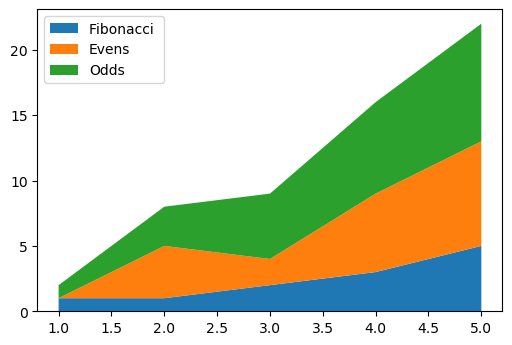

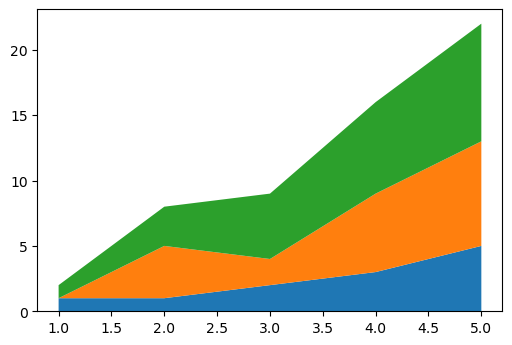

In [17]:
# stacked fill

x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3])

labels = ["Fibonacci ", "Evens", "Odds"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y)

## Image

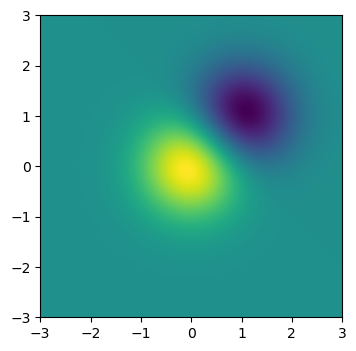

In [18]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', 
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

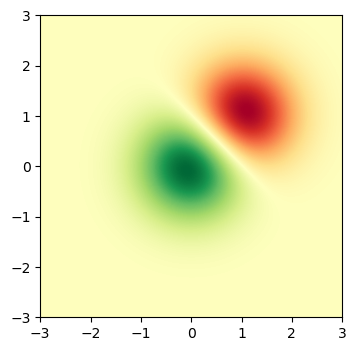

In [19]:
# change the cmap
fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap='RdYlGn',
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

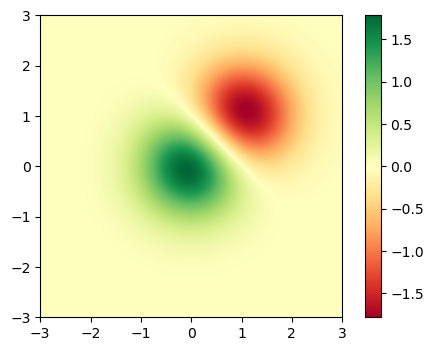

In [20]:
# add colorbar
fig.colorbar(im)
fig

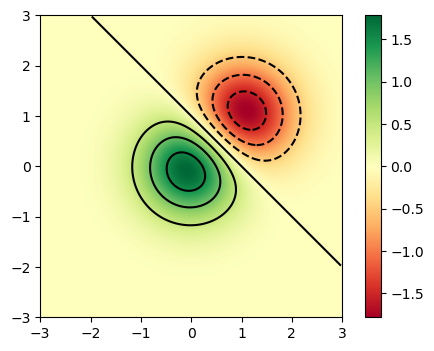

In [21]:
# add the contour
ax.contour(X, Y, Z, colors='k')
fig

## Text, annotation

[(-5.0, 3.0), (-1.0, 5.0)]

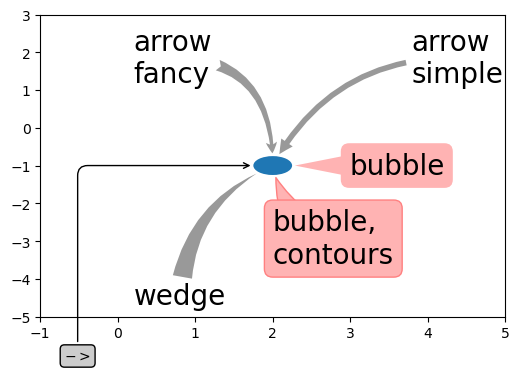

In [22]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()

el = Ellipse((2, -1), 0.5, 0.5)
ax.add_patch(el)

ax.annotate('$->$',
            xy=(2., -1), xycoords='data',
            xytext=(-150, -140), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            patchB=el,
                            connectionstyle="angle,angleA=90,angleB=0,rad=10"))

ax.annotate('arrow\nfancy',
            xy=(2., -1), xycoords='data',
            xytext=(-100, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('arrow\nsimple',
            xy=(2., -1), xycoords='data',
            xytext=(100, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=0.3"))

ax.annotate('wedge',
            xy=(2., -1), xycoords='data',
            xytext=(-100, -100), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.7",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=-0.3"))

ann = ax.annotate('bubble,\ncontours',
                  xy=(2., -1), xycoords='data',
                  xytext=(0, -70), textcoords='offset points',
                  size=20,
                  bbox=dict(boxstyle="round",
                            fc=(1.0, 0.7, 0.7),
                            ec=(1., .5, .5)),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.8),
                                  connectionstyle="arc3,rad=-0.1"))

ann = ax.annotate('bubble',
                  xy=(2., -1), xycoords='data',
                  xytext=(55, 0), textcoords='offset points',
                  size=20, va="center",
                  bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec="none",
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.5)))

ax.set(xlim=(-1, 5), ylim=(-5, 3))

In [23]:
%pylab
x = randn(10000)
plt.hist(x, 100)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['scatter', 'irr']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([  2.,   0.,   1.,   2.,   3.,   2.,   0.,   3.,   4.,   3.,   3.,
         15.,  11.,  11.,  11.,  11.,  22.,  28.,  27.,  35.,  32.,  36.,
         44.,  39.,  48.,  74.,  74.,  95., 115., 100., 131., 125., 124.,
        176., 166., 197., 203., 211., 248., 199., 240., 265., 269., 275.,
        293., 291., 309., 287., 301., 285., 310., 270., 291., 302., 273.,
        243., 260., 236., 250., 185., 196., 188., 166., 173., 122., 124.,
        109., 120.,  89.,  74.,  77.,  78.,  65.,  54.,  57.,  41.,  34.,
         31.,  21.,  16.,  22.,  11.,  11.,  10.,  12.,   6.,   5.,   2.,
          4.,   4.,   2.,   2.,   3.,   1.,   1.,   2.,   0.,   0.,   0.,
          1.]),
 array([-3.58467665, -3.51059284, -3.43650902, -3.3624252 , -3.28834139,
        -3.21425757, -3.14017375, -3.06608993, -2.99200612, -2.9179223 ,
        -2.84383848, -2.76975466, -2.69567085, -2.62158703, -2.54750321,
        -2.4734194 , -2.39933558, -2.32525176, -2.25116794, -2.17708413,
        -2.10300031, -2.02